In [1]:
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:65% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import neural_net as nn

In [2]:
# Select an objective task
#obj = 'logistic-reg'
obj = 'linear-reg'

# Create labels
def ground_prediction(x1_i, x2_i):
    if obj == 'logistic-reg':
        return np.bitwise_xor(x1_i, x2_i)
    elif obj == 'linear-reg':
        return x1_i + x2_i
    
    
# Create samples, two-dimensional input    
n_samples = 1000
X1 = np.random.choice(np.random.randint(0, 2, 10000), n_samples)
X2 = np.random.choice(np.random.randint(0, 2, 10000), n_samples)
X = np.asarray([X1, X2]).transpose()

# Normalize the input
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X)
X_norm = scaler.transform(X)


# Get the labels for each sample
y = list()
for i in np.arange(X.shape[0]):
    y_i = ground_prediction(X[i, 0], X[i, 1])
    y.append(y_i)
    
y = np.asarray(y)

/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
nn_test = nn.NeuralNet([2, 2, 3, 2, 1], batch_size=128, objective=obj)

In [4]:
nn_test.train(X=X_norm, 
              Y=y, 
              r=9e-2, 
              iterations=5000, 
              shuffle=False, 
              check_grad=True)

Gradient Checking is Matching!
Gradient Checking is Matching!
Gradient Checking is Matching!
Gradient Checking is Matching!
Gradient Checking is Matching!


In [5]:
y_fitted = nn_test.train_fitted()

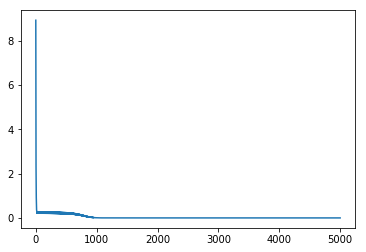

In [6]:
plt.plot(nn_test.obj_history)
plt.show()

In [12]:
# Check the layer attributes
nn_test.net[1].print_layer()

W:
 [[ 0.37338047  1.06646038 -0.66831908]
 [-0.11288013  1.55639829 -1.62513687]
 [-0.36884382 -1.13214711  1.77040329]] 

z: [[-2.4216935   3.10508011 -2.4216935   1.25835851  1.25835851 -2.4216935
  -2.4216935  -2.4216935  -2.4216935   1.25835851  1.25835851  1.25835851
   1.25835851  1.25835851 -2.4216935  -2.4216935  -2.4216935  -2.4216935
   1.25835851 -0.57497191 -2.4216935   1.25835851  1.25835851  3.10508011
  -2.4216935   1.25835851  1.25835851 -0.57497191  3.10508011  3.10508011
  -0.57497191 -0.57497191  1.25835851  3.10508011  3.10508011  1.25835851
  -0.57497191  1.25835851 -0.57497191 -0.57497191  3.10508011 -0.57497191
   3.10508011  3.10508011 -0.57497191  1.25835851 -0.57497191 -2.4216935
  -0.57497191 -2.4216935  -0.57497191 -2.4216935  -0.57497191  1.25835851
  -2.4216935  -2.4216935   1.25835851 -2.4216935   3.10508011 -0.57497191
  -0.57497191 -2.4216935   3.10508011 -2.4216935   1.25835851 -0.57497191
  -2.4216935   3.10508011 -0.57497191  1.25835851 -2.4216935  